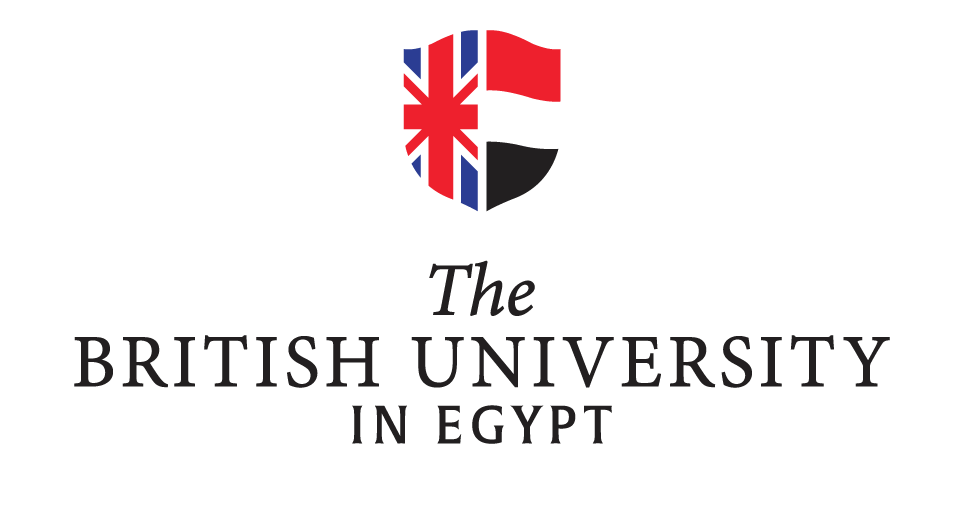

<center>
<h2 style="text-align: center;"></h2>
<h2 style="text-align: center;">Introduction to Data Science</h2>
<h2 style="text-align: center;">23CSAI01I</h2>
<h3 style="text-align: center;">Phase 2 Report</h3>


# Data Scientist Salary

<h2>
Amr228074 - Loay222929 -  Sameh218767
<h3 style="text-align: center;">Group 19</h3>
</center>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np
import warnings

from mpl_toolkits.mplot3d import Axes3D ## to enable 3D plotting
import ipywidgets as widgets # this makes me have iteractive widgets(this will be use to answer Q3.2)
from ipywidgets import interactive ## this for interactive plots.

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data_cleaned_2021.csv')
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: './datasets/data_cleaned_2021.csv'

# Overview of The Dataset

**About Dataset:**
This dataset provides insights into data scientist salaries and job postings in the United States for the year 2021. It contains information on 742 unique job postings and is designed for data analysis and modeling. This dataset provides valuable data for anyone interested in data science careers, salary trends, or the skills landscape for data scientists in the US and acts as a reference point and training set to predict future changes and trends in the industry.

**Source:** https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor


---
**Note**: There is a second dataset that will be imported later for specific questions for a more comprehensive analysis

In [ ]:
df.head()

# Data Preprocessing


Important Note: The following steps outline the general data cleaning of the dataset and represents only an early stage of data pre-processing. Each specific question you explore from this data may necessitate additional, tailored pre-processing steps to ensure optimal analysis.

In [ ]:
def clean_salary(salary_str):
  pattern = r"\([^)]*\)"
  found = re.search(pattern, salary_str)
  if found:
    return salary_str[:found.start()].strip()
  else:
    return salary_str

In [ ]:
def count_competitors(competitors):
  if competitors == '-1':
    return 0
  else:
    return len(competitors.split(','))

In [ ]:
def seniority_binarization(seniority):
  if seniority == 'sr':
    return 1
  else:
    return 0

In [ ]:
def lower_size(size):
  range_pattern = r'\d+ \- \d+'
  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  if found_range:
    bounds = size.split('-')
    return int(bounds[0].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [ ]:
def upper_size(size):
  range_pattern = r'\d+ \- \d+'
  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  if found_range:
    bounds = size.split('-')
    return int(bounds[1].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [ ]:
def Remove_numerical_outliers(df,Column_name,Excluded_range):
    df = df[df[Column_name] <= Excluded_range]

In [ ]:
# General Data cleaning beginning

# Remove duplicates
df.drop_duplicates(keep=("last"), inplace=True)

#Remove (Glassdoor est.)
df['Salary Estimate'] = df['Salary Estimate'].apply(clean_salary)

#Encoding
df['Competitors'] = df['Competitors'].apply(count_competitors)

# Remove negative ratings
df = df[df['Rating'] >= 0]

# Move values from company_txt to Company Name
df.loc[:, 'Company Name'] = df['company_txt']

# Seperate city from state
df.insert(7, 'Job City Location', df['Location'].str.split(',').str[0])

# Binarization of Senriority
df['seniority_by_title']=df['seniority_by_title'].apply(seniority_binarization)

# Seperate Size into Lower Size and Upper Size
df.insert(9, 'Lower Size', df['Size'].apply(lower_size))
df.insert(10, 'Upper Size', df['Size'].apply(upper_size))

# Change Salary data type
df['Avg Salary(K)'] = df['Avg Salary(K)'].astype(float)

# Drop redundant columns
df.drop(columns=['Size','company_txt', 'Salary Estimate', 'Location'], inplace=True)



df = df[df['Industry'] != '-1']
df = df[df['Founded'] != -1]


# Dataset After Cleaning

In [ ]:
df.head(100)

# General Visualization

Before we get down to numbers, let's visualize the data. Charts and graphs will act as our compass, revealing hidden trends and relationships and pave the way for deeper insights into these job markets as we go further on.




<h1>Summary Statistics and Distribution of Numerical Variables</h1>

We start by diving into the numerical data (like 'Rating', 'Avg Salary', and 'Age') using summary statistics. This gives us a quick snapshot of the data's center (average, median) and spread (standard deviation) with describe(). Visualizing these distributions with histograms helps us understand if the data is skewed or follows a normal pattern. This initial analysis is crucial for choosing the most appropriate techniques for further exploration.

In [ ]:
numerical_columns = ['Rating', 'Avg Salary(K)', 'Age']

summary_stats = df[numerical_columns].describe()
print(summary_stats)

plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h1> Violin Plots for Exploring Numerical Variable Distributions</h1>

 Violin plots offer another way to explore the distribution of numerical variables. They provide a combined view of the data's spread, density, and potential outliers. Analyzing these plots alongside histograms can give us a more comprehensive understanding of how the data is distributed.

In [ ]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.violinplot(y=df[column], color='skyblue')
    plt.title(f'Violin Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


<h1>Boxplots for Examining Numerical Variable Spread</h1>

Boxplots come in handy to examine the spread of numerical variables. They effectively illustrate the distribution, highlighting the median, quartiles (25th and 75th percentiles), and potential outliers. Identifying outliers and understanding the spread of data points is essential for drawing meaningful conclusions from our analysis later.

In [ ]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<h1>Frequency Analysis of Categorical Variables</h1>

We calculate the frequency of each category within each column. This analysis helps us grasp the composition of our data and identify the most common categories within each variable. Understanding these distributions is vital for exploring relationships between categorical and numerical variables later.

In [ ]:
categorical_columns = ['Lower Size','Upper Size', 'Type of ownership', 'Industry', 'Sector']

# Count the frequency of different categories in each categorical column
category_counts = {}
for column in categorical_columns:
    category_counts[column] = df[column].value_counts()

<h1>Bar Chart Visualization of Category Frequencies</h1>

These charts visually represent the frequency of each category within a variable, making it easier to identify dominant categories and compare them across different variables. This allows us to spot trends and patterns in the categorical data.

In [ ]:

# Plot bar plots for categorical variables
plt.figure(figsize=(20, 40))

for i, (column, counts) in enumerate(category_counts.items(), 1):
    plt.subplot(len(category_counts), 1, i)
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h1>Relationship between two numerical variables</h1>

We delve into the relationship between two numerical variables, 'Avg Salary' and 'Rating'. A scatter plot visualizes individual data points, revealing potential trends or clusters. To enhance this exploration, we incorporate marginal histograms that display the distribution of each variable on its own axis. This combination offers a multi-faceted view of the data, aiding in identifying patterns and potential correlations.

In [ ]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='Avg Salary(K)', y='Rating', data=df, kind='scatter', color='skyblue', marginal_kws=dict(bins=20, fill=True))
plt.xlabel('Average Salary (in Thousands)')
plt.ylabel('Rating')
plt.suptitle('Relationship between Salary and Rating', y=1.02)
plt.show()

<h1>Top Job Titles with Error Bars</h1>

Delving into job titles, we analyze their frequency to uncover the most common job roles represented in the data. Understanding job title distribution can reveal trends in job families, potential skills gaps, or even areas for recruitment focus. This analysis forms a crucial foundation for further exploration and decision-making.

In [ ]:
job_title_counts = df['Job Title'].value_counts()
top_job_titles = job_title_counts.head(20)
plt.figure(figsize=(12, 8))
plt.errorbar(x=top_job_titles.index, y=top_job_titles.values, yerr=np.sqrt(top_job_titles.values), fmt='o', color='skyblue', elinewidth=2, capsize=5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Titles')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Job Titles with Error Bars')
plt.tight_layout()
plt.show()


<h1>Skill Frequency Analysis</h1>

Identifying the most prevalent skills can guide workforce planning, training initiatives, or even recruitment strategies. Using a horizontal bar chart, we create a compelling visual representation of skill frequencies, making it easier to grasp the skill landscape at a glance.

In [ ]:

skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

skill_counts = df[skills_columns].sum()

skill_counts = skill_counts.sort_values(ascending=True )

plt.figure(figsize=(10, 8))
skill_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Frequency of Skills')
plt.show()


## Now that we have established what we are working with and how it may yield useful insights, it is about time we dive deep into extrating insights with the data.


---



# Amr228074 Work

## The `Bottom Up Approach` will be used to solve the first and third questions.

## `1- Which industry has the maximum correlation of the Top two mentioned skills in the data scientists job description?`


*   Q1.1- Can we identify the most common (the highest demand) skills mentioned in the job description and where their demand for each indutstry?
*   Q1.2- Which industries show the highest correlation between the two highest-demand jobs?

## `2- Can we provide insights into the distribution of data science tools mentioned in the data set job descriptions?`

## `3- How do organizational characteristics, such as company age, and performance metrics, such as revenue and ratings, shape the talent demands for data scientists and influence the overall success of companies? `



*   Q3.1- Can we identify how the required skillset of `data scientists` changes based on company's Age?
*   Q3.2- How does the interplay between company revenue, rating, and age contribute to understanding the overall performance and reputation of a company?
*     Q3.2.1 How the rating of a company tend to increase or decrease with company's age?
*     Q3.2.2 Do companies with higher revenue tend to have higher or lower ratings compared to younger companies?





## Simple Overview About the Available Skills Within Different Industries

In [ ]:
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
industry_column = ['Industry']
relevant_df = df[industry_column +skills_columns ] # creating relevant data frame of industries and skills.
relevant_df.head(10)

### Using the newly created data frame we will visualize the distribution of the skills across industries using heat map from Seaborn library to explore `specific` areas of the dataset with regard to skills in different industries.

In [ ]:
Grouped_df = relevant_df.groupby('Industry').sum()

annot_mask = Grouped_df.applymap(lambda x: '' if isinstance(x, (int, float)) else x)
plt.figure(figsize=(20, 18))
sns.heatmap(Grouped_df, annot=annot_mask, fmt='', cmap="YlGnBu")
plt.title('Distribution of Skills Across Different Industries')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### `Q1.1- Can we identify the most common (the highest demand) skills mentioned in the job description and where their demand for each indutstry?`

#### We begin by extracting skills from the job descriptions that weren't explicity mentioned in the dataset.

In [ ]:
##
print(df['Job Description'][80])
##

### Extracting more required skills from the job description.

In [ ]:
Skills__List = ['python', 'R', 'sql', 'excel', 'tableau', 'power bi', 'sas', 'spark', 'hadoop', 'java', 'scala', 'tensorflow', 'keras', 'pytorch', 'scikit-learn', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'aws', 'azure', 'google cloud', 'big data', 'machine learning', 'deep learning', 'data mining', 'data analysis', 'data visualization', 'statistics', 'mathematics']
## This a list of the most common skills in the data science field.

# This function to count the demand for each skill in the job descriptions.
def Skills_Counter_(Description):
    Description = Description.lower()
    return Counter(Skill for Skill in Skills__List if Skill in Description)
## so this simply counts how many times the skill is mentioned in the job description.



In [ ]:
# Applying Skills_Counter_ the function on job description column  then take sum.
skills_counter = df['Job Description'].apply(Skills_Counter_).sum()

# Convert skills_counter to a dataframe
Skills__df = pd.DataFrame(skills_counter.most_common(), columns=['Skill', 'Count'])
## most_common() method returns a list of the n most common elements and their counts
## from the most common to the least common skills

print(Skills__df)

In [ ]:
Skill_Names = [Skill.capitalize() for Skill, Count in skills_counter.most_common()]
## using capitalize method to be in a stander form

Skill_Counts = [Count for Skill, Count in skills_counter.most_common()]

In [ ]:
print(Skill_Names[0]) ## first mentioned skill from job description.
print(Skill_Counts[0])

In [ ]:
print(Skill_Names[1]) ## second mentioned skill from job description.
print(Skill_Counts[1])

In [ ]:
First_Highest_Skill_Demand =Skill_Names[0]

In [ ]:
Second_Highest_Skill_Demand =Skill_Names[1].lower()

In [ ]:
plt.figure(figsize=(15, 12))
plt.bar(Skill_Names, Skill_Counts)

# Adding frequency annotations to each bar
for i in range(len(Skill_Names)):
    plt.text(i, Skill_Counts[i] + 0.5, str(Skill_Counts[i]), ha='center', va='bottom', fontsize=10)

plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Frequency of Skills Mentioned in Job Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The previous visualization shows the frequency of skills mentioned in the job description. it shows that Python has the first highest demand with frequency = 372, then SQL the second highest demand with frequency = 358

In [ ]:
def Specific_Skill_Across_industries(Skill):
    Skill_Demand = relevant_df.groupby('Industry')[Skill].sum().sort_values(ascending=False)

    percentages = (Skill_Demand.head(10) / Skill_Demand.head(10).sum()) * 100

    plt.figure(figsize=(15, 15))
    plt.pie(Skill_Demand.head(10), labels=[f'{label} ({percentage:.2f}%)' for label, percentage in zip(percentages.index, percentages)], startangle=140)
    plt.title(f"Demand for '{Skill.capitalize()}' Across Industries")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


This visualization delves into the industry-specific demand for the skill most frequently mentioned across various job descriptions. To achieve this, we bypass the intermediary string variable "First_Highest_Skill_Demand" and directly utilize the "Specific_Skill_Across_industries" variable constructed earlier. This streamlined approach allows us to present a clearer picture of how the demand for this dominant skill varies across different industry sectors.

In [ ]:
Specific_Skill_Across_industries(First_Highest_Skill_Demand)

### Q1.1 Answer
### `Racall Q1.1` Q1.1- Can we identify the most common (the highest demand) skills mentioned in the job description and where their demand for each industry?

### Answering Q1.1
The highest demand skill mentioned in the job description is Python with a frequency count = 372, making Python the highest demand skill with 15.56% of Python demand is in Computer Hardware and Software Industry

----------------------------------------------------

## `Q 1.2: Which industries show the highest correlation between the two highest-demand jobs?`

#### From the previous question(Q1.1) we know that the highest demand jobs is Python then SQL.

In [ ]:

# calc the correlation matrix for Python and SQL  across industries.
Grouped__Data =  df.groupby( 'Industry')[[First_Highest_Skill_Demand, Second_Highest_Skill_Demand]].corr().unstack().iloc[:,1]
Grouped__Data = Grouped__Data.reset_index()

Grouped__Data = Grouped__Data[~Grouped__Data['Industry'].isin(['Insurance Agencies & Brokerages', 'Wholesale'])]
## Exclude those two Industries because their space is soo small.

Corr_between_two_skills = f'Correlation between {First_Highest_Skill_Demand} and {Second_Highest_Skill_Demand}'

Grouped__Data.columns =  ['Industry',  Corr_between_two_skills ]

Grouped__Data = Grouped__Data.drop(0) # brop it because it has no correlation with any skill anymore (it is useless).


# so the industries will be sorted by the correlation between Python and sql.
data_grouped_sorted =  Grouped__Data.sort_values ( by= Corr_between_two_skills, ascending=False)


data_grouped_sorted.head()

In [ ]:
data_grouped_sorted.reset_index(drop=True, inplace=True)
data_grouped_sorted.index += 1 ## adding 1 to the starting index to start from index 1 instead of starting with index 0
data_grouped_sorted.index.name = 'Ranking'
data_grouped_sorted.head()

In [ ]:
plt.figure(figsize=(12, 12))
plt.barh(data_grouped_sorted['Industry'], data_grouped_sorted[Corr_between_two_skills], color='skyblue')
plt.xlabel('Correlation')
plt.title(Corr_between_two_skills+ ' across Industries')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest correlation at the top
plt.show()

### Q1.2 Answer
### `Racall Q1.2` Q1.2-Which industries show the highest correlation between the two highest-demand jobs?

### Answering Q1.2:
The highest correlation between the two highest-demand jobs (Python and Sql) is in the Banks & Credit Unions industry with a positive correlation = 0.707.
Correlation = 0.707 between Python and SQL means that there is a perfect positive linear relationship between them. In other words, as one variable increases (Python or SQL), the other variable also increases proportionally

## Conclude The Final Answer To Question 1
Based on the analysis, we can conclude that Python is the most in-demand skill for data scientist jobs. The Computer Hardware and Software Industry shows the highest demand for Python. This suggests a strong reliance on this skill within technology-driven sectors.

Additionally, the Banks & Credit Unions industry demonstrates a very strong positive correlation between Python and SQL (correlation = 0.707). This indicates that as the demand for Python increases, the demand for SQL also increases proportionally within the Banks & Credit Unions industry.

----------------------------------------------------


## Q 2: Can we provide insights into the distribution of data science tools mentioned in the data set job descriptions?

#### To identify data-related skills, we will search for the keyword 'data' within the skill_counter created earlier and count it.

In [ ]:
# Recall skills_counter that I was created in the above cells
skills_counter.items()

In [ ]:
data_science_tools__mentionded_in_job__descriptions = [skill for skill in skills_counter.keys() if 'data' in skill]
data_science_tools__mentionded_in_job__descriptions

#### We will now proceed to iterate through the skills_counter dictionary to identify the number of data science tools mentioned in the job descriptions.

In [ ]:
## creating dectionary of key --> tool ,  value --> frequency
dic_of_too_and_tool_counts = {tool: skills_counter[tool] for tool in data_science_tools__mentionded_in_job__descriptions}


In [ ]:
dic_of_too_and_tool_counts

In [ ]:
## Store tool names from dic_of_too_and_tool_counts in a list called 'tools'
## And store the count of each from dic_of_too_and_tool_counts in list called 'counts'
tools = list(dic_of_too_and_tool_counts.keys())
counts = list(dic_of_too_and_tool_counts.values())

In [ ]:
plt.figure(figsize=(15, 8))
bars = plt.bar(dic_of_too_and_tool_counts.keys(), dic_of_too_and_tool_counts.values(), color='skyblue')
plt.xlabel('Data Sceince Tools')
plt.ylabel('Frequency')
plt.title('Distribution of Data Sceince Tools in Job Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

### `Racall Q2` Q2-Can we provide insights into the distribution of data science tools mentioned in the data set job descriptions?
### Answering Q2:
From the previous distribution, we notice that the highest data science tool mentioned in the job description is data analysis with mention frequency= 201, this reflects the importance of data analysis tool in data science domain.

--------------------------------------------------------------------------
-----------------------------------
-----------------------
--------------------------

## Q3- How do organizational characteristics, such as company age, and performance metrics, such as revenue and ratings, shape the talent demands for data scientists and influence the overall success of companies?

#### In order to answer Q3 I need first to answer it's sub questions first (Bottom Up Approach)

### Q3.1: Is there a Correlation Between Company Age and Required `Data Scientists` Skillset?

In [ ]:
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

In [ ]:
df['Number_of_Skills'] = df[skills_columns].sum(axis=1)

In [ ]:
age_job_skills = df[['Age', 'Job Title', 'Number_of_Skills']]

In [ ]:
age_job_skills.head()

In [ ]:
age_range = np.arange(1, 300, 10)  # Companies From 1 to 300 with intervals of 10 months for the company age.

plt.figure(figsize=(20, 10))
plt.scatter(age_job_skills['Age'], age_job_skills['Number_of_Skills'], color='blue', alpha=0.5)
plt.title('Relationship between companys Age and Number of requered Skills')
plt.xlabel('Age')
plt.ylabel('Number of Requeried Skills')
plt.xticks(age_range)
plt.grid(True)
plt.show()


### Q3.1 Answer
### `Racall Q3.1` Q3.1: Is there a Correlation Between Company Age and Required Data Scientists Skillset?
### Answering Q3.1:
Analysis suggests a trend where younger companies (startups) tend to require a broader range of skills from their data scientists compared to established companies. This could be attributed to budget constraints in startups, necessitating employees to wear multiple hats and maximize their value contribution. As companies mature and scale, their data science needs might evolve, potentially leading to a shift towards more specialized roles or deeper expertise in specific domains.


----------------------------------------------
--------------------------------------------

### Q3.2-Are company ratings influenced by other variables such as revenue or age?

In [ ]:
## First take a look at how the company's revenues are represented in my data set.
df['Revenue']

In [ ]:
def extract_numeric_value(text):
    # Regular expression pattern to company's revenues represented in numeric values
    pattern = r'(\d+(\.\d+)?)(?=\s*(million|billion)?\s*\(USD\))'
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return float(match.group(1))
    else:
        return None  # Or any other value indicating no match

In [ ]:
def normalize_to_usd(value, unit):
    # Define conversion factors for different units to USD (Currency categories)
    conversion_factors = {
        'million': 1e6,
        'billion': 1e9
    }
    return value * conversion_factors.get(unit, 1) ##this return statement will return the company's revenues in USD

In [ ]:
for revenue in df['Revenue']:
    numeric_value = extract_numeric_value(revenue)
    if numeric_value is not None:
        print("Extracted numeric value:", numeric_value)
        print("Normalized value in USD:", normalize_to_usd(numeric_value, 'million'))
    else:
        print("No numeric value found in:", revenue)

In [ ]:
revenue_list=[]
for revenue in df['Revenue']:
    numeric_value = extract_numeric_value(revenue)
    if numeric_value is not None:
       revenue_list.append ( normalize_to_usd(numeric_value, 'million'))
    else:
        revenue_list.append ( None)
revenue_list

In [ ]:
companies_df=df

In [ ]:
companies_df['Revenu As numeric value']=revenue_list
companies_df = companies_df.dropna(subset=['Revenu As numeric value'])
companies_df[['Company Name','Revenu As numeric value']]

In [ ]:
companies_df = df[df['Age'] <= 250]
## This will remove the row of any Age value greater that 200.

In [ ]:
companies_df['Age'].max()

### Q3.2.1 How the rating of a company tend to increase or decrease with company's age?

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(companies_df['Rating'], companies_df['Age'], color='red', alpha=0.5)
plt.title('Company Rating vs Age')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.grid(True)
plt.show()

This visualization shows that companies with smaller ages have a good chance of having high ratings, so that means that the increase in company age didn't lead to high company rates.

---------------------------

### Q3.2.2 How companies with higher revenue tend to have higher or lower ratings compared to younger companies?

In [ ]:
def plot_3d_scatter(elevation, azimuth): ## Evalution and Azumuth is angles for adjusting
                                         ## the the viewing of 3D plot.

    companies_df_million = companies_df.copy()
    ## Without using .copy method we will have error,because this means
    ## that we are creating a reference to the original dataFrame.

    companies_df_million['Revenu As numeric value'] /= 1000000
    # Convert revenue to millions to fit screen dimensions.

    companies_df_million = companies_df_million.sort_values(by='Revenu As numeric value')  # Sort by revenue


    fig = plt.figure(figsize=(25, 10))
    ax = fig.add_subplot(111, projection='3d')
    ## NOw creating new figure and 3d subplot.

    scatter = ax.scatter(companies_df_million['Rating'], companies_df_million['Age'], range(len(companies_df_million)), c=companies_df_million['Revenu As numeric value'], cmap='viridis', alpha=0.5)
    # Creating Scatter plot withing the 3D subplot that was created above
    ## and set setting all method parameters such as cmap(color map), alpha(points transparency),....etc

    cbar = plt.colorbar(scatter)
    cbar.set_label('Revenue (Million)')
    ## Set the color bar Revenue column.

    #####
    ax.set_xlabel('Rating')
    ax.set_ylabel('Age')
    ax.set_zlabel('Total Revenue')
    ax.set_title('Company Rating vs Age vs Revenue (Million)')

    ax.view_init(elevation, azimuth)
    ## This line sets the viewpoint of the 3D plot
    ### based on the elevation(high) and azimuth angles provided as arguments.

    plt.show()




In [ ]:

interactive_plot = interactive(plot_3d_scatter,
                               elevation=widgets.IntSlider(min=0, max=180, step=1, value=19),
                               azimuth=widgets.IntSlider(min=0, max=360, step=1, value=30))## Now this line creates an interactive widget using an interactive function, after that we
## Assign to plot_3d_scatter function with the interactive plot.

In [ ]:
interactive_plot

This visualization presents the distribution of revenue across company age demographics. While there appears to be a concentration of yellow data points (potentially representing higher revenue) in the younger company area, a more comprehensive analysis is necessary to draw definitive conclusions about the relationship between company age and revenue.

## Conclude The Final Answer Of Question 3:
Organizational traits, such, as the age of a company play a role in shaping the number of requirements for data scientists. Startups often prioritize a range of skills due to constraints while `established companies may lean towards more specialized roles or expertise in specific domains as they progress`. Moreover analyzing the correlation focuses on the link between company ratings and performance metrics. `Although there is a correlation between ratings and revenue suggesting a possible connection between higher ratings and increased revenue older companies tend to have lower ratings compared to younger ones`.


---




# Loay222929 Work

<h2> Answering Q4</h2>

**Q4: Can we identify any correlations between specific educational backgrounds and the acquisition of in-demand skills based on the job descriptions they qualify for?**

- Columns would be used: {Degree, (the skills columns)}, Job Descriptions}

- Grouping data based on “degree” (educational background), you can look at the common skills in the job description for each “degree”.
Identify skills that are not there in different degrees, those skills can be considered skills acquired in different “degrees” {bachelor, masters, doctoral}

- Graphs (Frequency tables, bar charts, heatmaps)

Mapping Skills to Educational Degrees:

In [ ]:
# df['Job Description'].str.contains(r".*Master(?i).* | .*Bachelor(?i).*")
filtered_df = df[df['Job Description'].str.contains(r'\bMaster.* | \bmaster.* | \bBachelor.* | \bbachelor.*', re.I)]
filtered_df

In [ ]:
def assign_degree_level(text):
  if re.search(r'\bMaster.* | \bmaster.*', text):
    return "Master"
  elif re.search(r'\bBachelor.* | \bbachelor.*', text):
    return "Bachelor"
  else:
    return None

# Apply the function to the 'Job Description' column
filtered_df['Degree Level'] = filtered_df['Job Description'].apply(assign_degree_level)
filtered_df


In [ ]:
# need to isolate skills and their respective degree
# condense them into the degrees that exist in the degree column: array(['M', 'na', 'P'], dtype=object)
# size of dataframe (731, 41)

# df['Degree'].unique()
skills = filtered_df.iloc[:, [i for i in range(22, 38)]]

In [ ]:
degreeSkills = skills.join(filtered_df['Degree Level'])
degreeSkills.describe()

Classification of Skills Based on Educational Degrees

In [ ]:
degree_groups = degreeSkills.groupby('Degree Level')  #grouping skills for each unique 'Degree'
for x in degree_groups.groups:
    print(str(x) + ": " + str(len(degree_groups.groups[x])))    #how many rows for each 'Degree'


 Calculating Average Skill Frequency per Degree:

In [ ]:
skills_count = []
for key, item in degree_groups:
    skills_count.append(item.iloc[:, :-1].mean())

degree_skill_count = pd.DataFrame(skills_count, index=degree_groups.groups.keys())
# degree_skill_count['Degree'] =degree_groups.groups.keys()
degree_skill_count

In [ ]:
sns.heatmap(degree_skill_count, cmap="Reds")

In [ ]:
# Find the maximum frequency across all education levels
max_frequency = degree_skill_count.max().max()

# Number of subplots (based on education levels)
n_subplots = len(degree_skill_count)

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(15, 5))  # Adjust figure size as needed

# Iterate through each row (education level) and plot on its respective subplot
for i, (degree, skills) in enumerate(degree_skill_count.iterrows()):
  ax = axes[i]  # Get the current subplot axis
  skills.plot.bar(ax=ax, ylim=(0, max_frequency + 0.01))  # Plot on the specific axis
  ax.set_title(f"Skill Frequency Distribution (Degree: {degree})")
  ax.set_xlabel("Skill")
  ax.set_ylabel("Frequency")
  ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [ ]:
alpha = 0.5
color = [0, # red
         0, # green
         0 # bluen
]

for degree, skills in degree_skill_count.iterrows():
    # print(skills.index)
    if(degree == 'na'):
        continue
    plt.bar(skills.index, skills, label=degree, alpha=alpha, edgecolor=color)

plt.xlabel("Skill Index")  # Adjust label as needed if skill names are used on bars
plt.ylabel("Frequency of Skill")
plt.xticks(rotation=45)  # so skill names don't overlap
plt.legend()
plt.tight_layout()
plt.show()

Jobs that require Masters clearly demand more skills then bachelors so they clearly acquire more skills

In [ ]:
bar_width = 0.2
offset = 0.2

skill_names = degree_skill_count.columns.tolist()

plt.figure(figsize=(7, 4))

for i, (degree, skills) in enumerate(degree_skill_count.iterrows()):

  x_positions = [j+(i*offset) for j in range(len(skill_names))]

  plt.bar(x_positions, skills, bar_width, label=degree)

plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(x_positions, skill_names, rotation=45)
plt.legend()
plt.show()

---

<h2> Answering Q5</h2>

**Q5: can we identify highly interconnected skills that are common across different industries?**
(Q5 is Extend for Q1 for the common skills as pairs (Q5 is Common work between Amr and Loay))

- Columns would be used: {(the skills columns), Industry}
- We aim to identify skills that are frequently required together. While co-occurrence matrices can provide initial insights into pairwise or potentially three-way relationships (limitations of 2D and 3D matrices), clustering techniques offer a more comprehensive approach. Clustering algorithms can group skills based on their co-occurrence patterns across various industries. This allows us to identify broader clusters of interconnected skills that frequently appear together. To visualize these skill clusters and their relationships, we can leverage data visualization techniques such as heatmaps, network graphs, or scatter plots. These visualizations will effectively depict the relative importance and interconnectedness of skills within each cluster, facilitating a deeper understanding of the skill landscape across different industry sectors.

Isolating skills and industries to work on them

In [ ]:
skills = df.iloc[:, [i for i in range(22, 38)]]
industry_skills = skills.join(df['Industry'])

industry_skills['Industry'].unique()

Removing remaining nulls from each industry

In [ ]:

industry_skills = industry_skills.drop(industry_skills[industry_skills['Industry'] == '-1'].index)
industry_skills['Industry'].unique()

Identifying Highly Correlated Skills

In [ ]:
pd.set_option('display.max_rows', None);

sorted_corr_skills = skills.corr().abs().unstack().sort_values(kind="quicksort").drop_duplicates()
sorted_corr_skills = sorted_corr_skills[lambda x: x != 1.0]


Grouping Skills With Their Eespective Industries

In [ ]:
pd.set_option('display.max_rows', 100);
industry_skills_grouped = industry_skills.groupby('Industry')

Goals:


*   Constructing correlation matrices for each industry. These matrices will quantify the statistical relationships between various skills within each industry.
*   We need to identify the most frequently interconnected skill sets within each industry. These skills likely represent core competencies sought after in that specific industry.
*   Grouping interconnected skill sets across different industries. This will reveal potential commonalities and specializations in required skillsets across various sectors of the workforce.



    
    
    

Skill correlations are calculated for each industry and stored in a dictionary. To ensure data quality, the analysis excludes perfect correlations, duplicate entries within an industry, and industries lacking any correlations. Additionally, correlations below a predefined threshold (e.g., 0.6) are removed to focus on the most significant skill relationships.

In [ ]:
ind_corr_skills = {}
for key, item in industry_skills_grouped:
    # print(key)
    item1 = item.iloc[:, :-1].corr().unstack().sort_values().drop_duplicates().dropna()
    item1 = item1[lambda x: x != 1.0]   #removing perfect correlations ex: (python, python)
    item1 = item1[lambda x: x >= 0.6]   #removing irrelavent correlations and keeping the most common

    if(len(item1) > 0):
        ind_corr_skills[key] = item1

# for ele in ind_corr_skills.keys():
#     print(ele)
ind_corr_skills
# print(len(ind_corr_skills))


Exploration of Industry Skill Interconnectivity:


*   We can identify the industry exhibiting the highest number of skill correlations. This exploration aims to uncover potential patterns or specializations within various industry skillsets.




In [ ]:
max = ["", 0]
for key in ind_corr_skills.keys():
    value_size = len(ind_corr_skills[key])
    if max[1] < value_size:
        max[1] = value_size
        max[0] = key
    # print(key + ": \t\t" + str(value_size))
    print("Key: %-*s  ValueSize: %s" % (40,key,value_size))

print("\n\nMAX: Key: %-*s  ValueSize: %s" % (40,max[0],max[1]))

Prioritizing Skill Pairs and Discarding Correlation Values

In [ ]:
for key in ind_corr_skills:
    items = list(ind_corr_skills[key].index)
    ind_corr_skills[key] = items

ind_corr_skills

Convert Data to DataFrame for Enhanced Analysis

In [ ]:
skill_pairs = []
industries = []

for industry, skill_pair_list in ind_corr_skills.items():
  skill_pairs.extend(skill_pair_list)
  industries.extend([industry for i in range(len(skill_pair_list))])

ind_corr_skills_df = pd.DataFrame(skill_pairs, columns=['skill 1', 'skill 2'])

ind_corr_skills_df['industry'] = industries

ind_corr_skills_df.head(20)

Combining skill pairs in a column

In [ ]:
ind_corr_skills_df['Skill Pairs'] = ind_corr_skills_df['skill 1'] + ", " + ind_corr_skills_df['skill 2']
ind_corr_skills_df.head(20)

<h4>Visualization of Skill Pair Distribution Across Industries</h4>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(ind_corr_skills_df, x='skill 1', y='industry', ax=ax1)
ax1.set_title("Skill 1 Distribution Across Industries")

sns.scatterplot(ind_corr_skills_df, x='skill 2', y='industry', ax=ax2)
ax2.set_title("Skill 2 Distribution Across Industries")

for tick in ax1.get_xticklabels():
    tick.set_rotation(65)

for tick in ax2.get_xticklabels():
    tick.set_rotation(65)

# plt.xticks(rotation=45)
# Adjust layout (optional)
plt.tight_layout()
plt.show()

This visualization depicts the industry distribution of a specific skill pair. By analyzing this distribution, we can identify industry clusters that share a common requirement for this particular skill set.

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(ind_corr_skills_df, x='Skill Pairs', y='industry')

plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

Comparative analysis of sectors and industries to determine if sectors represent broader categorizations of the more specific industry classifications.

In [ ]:
skills_count = []
for key, item in industry_skills_grouped:
    skills_count.append(item.iloc[:, :-1].mean())

skills_count
industry_skills_count = pd.DataFrame(skills_count, index=industry_skills_grouped.groups.keys())
# # degree_skill_count['Degree'] =degree_groups.groups.keys()
industry_skills_count.describe()

In [ ]:
sns.heatmap(industry_skills_count)

In [ ]:
pd.set_option('display.max_rows', None);

sector_skills = skills.join(df['Sector'])
sector_skills = sector_skills.drop(sector_skills[sector_skills['Sector'] == '-1'].index)

sector_skills_grouped = sector_skills.groupby('Sector')  #grouping skills for each unique 'Degree'
for x in sector_skills_grouped.groups:
    print(str(x) + ": " + str(len(sector_skills_grouped.groups[x])))

In [ ]:
skills_count = []
for key, item in sector_skills_grouped:
    skills_count.append(item.iloc[:, :-1].mean())

skills_count
sector_skills_count = pd.DataFrame(skills_count, index=sector_skills_grouped.groups.keys())

sns.heatmap(sector_skills_count)

Initial findings suggest a high degree of similarity between sectors and industries in terms of skill requirements. Sectors may represent a more general level of categorization compared to the more specific industry classifications.

---

<h2> Answering Q6</h2>

**Q6: Find the skills that highly correlate with a specific sector and find if there is an overlap between these specialized across different sectors**

<ul>
  <li>Find the 10 most common skills</li>
  <li>Finding which skills each sector uses most</li>
  <li>Use this as the connected skills for each sector and check which sectors share the same skill groups</li>
  <li>With the skill groups as the x axis and see which sector belong to which skill groups, and we got the sector clusters for each skill groups</li>
</ul>

Taking a quick look

In [ ]:
sector_skills_count

In [ ]:
sector_skills_count['Sectors'] = sector_skills_count.index
sector_skills_count

Getting the skills that highly correlate for each Sectors by a threshold

In [ ]:
def filter_skills_by_sector(df, threshold=0.5):
  filtered_df = df.copy()  # Create a copy to avoid modifying the original
  for col in filtered_df.columns:
    if col == 'Sectors':
      continue
    filtered_df.loc[filtered_df[col] < threshold, col] = None  # Set values below threshold to None
  filtered_df.dropna(axis=1, how='all', inplace=True)  # Drop columns with only None values
  return filtered_df.melt(id_vars='Sectors', var_name='Skill')

# Filter the DataFrame with a threshold of 0.5 (or adjust as needed)
filtered_sector_df = filter_skills_by_sector(sector_skills_count.copy(), threshold=0.5)

# Print the filtered DataFrame (optional)
filtered_sector_df

In [ ]:
filtered_sector_df = filtered_sector_df.dropna()
filtered_sector_df

<h3>Sectors Identified

In [ ]:
sns.scatterplot(filtered_sector_df, x='Skill', y='Sectors')
plt.xticks(rotation=45)


plt.show()

it looks similar to the heatmap

In [ ]:
sns.heatmap(sector_skills_count.drop('Sectors', axis=1))

# Sameh218767 Work

<h2> Answering Q7</h2>

**Q 7: Can we identify specific skill combinations that correlate to higher salary in different industries, compared to the same skills assessed individually?**

To first answer this question, we must first answer:

*   **Q 7.1: Which skills are often correlated together?**
*   **Q 7.2: What is the average salary to each of the correlated skills ?**
*   **Q 7.3: How does the average salary compare between the previous correlation to that of the individual skills and their salaries?**




First, we get the correlation between each skill and the other.

In [ ]:
#@title Q 7.1: Which skills are often correlated together?
skills_columns = df.columns[23:38]
plt.figure(figsize=(14, 11))
sns.heatmap(df[skills_columns].corr(),annot=True)

We then proceed to create a new dataframe that groups correlated skills and the degree of their correlation, answering the question:

In [ ]:
#@title Q 7.1: Which skills are often correlated together? (Continued)
skills_corr = df[skills_columns].corr()

skills_list = []
correlation_list = []

for i in range(len(skills_corr)):
  for j in range(len(skills_corr)):
    corr_loc = skills_corr.iloc[i][j]
    if corr_loc != 1:
      s_row = skills_corr.index.tolist()[i]
      s_column = skills_corr.columns.tolist()[j]
      skills_list.append([s_row, s_column])
      correlation_list.append(corr_loc)

print("Q.7.1. Answer: Skills that are often correlated together (in Order) are as follows: ")
corr_groupings = {'Skills': skills_list, 'Correlation': correlation_list}
corr_groupings = pd.DataFrame.from_dict(corr_groupings)
corr_groupings = corr_groupings.drop_duplicates(subset=['Correlation'], keep='first')
corr_groupings = corr_groupings.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
corr_groupings.head(15)

In [ ]:
#@title Q 7.2: What is the average salary to each of the correlated skills ?
corr_groupings['Avg Salary'] = 0
corr_groupings['Avg Salary'] = corr_groupings['Avg Salary'].astype(float)
skills_salaries = []
filtered_df = pd.DataFrame
for i in range(len(corr_groupings)):
    f_skill = corr_groupings['Skills'].tolist()[i][0]
    s_skill = corr_groupings['Skills'].tolist()[i][1]
    filtered_df = df[(df[f_skill] == 1) & (df[s_skill] == 1)]
    if not filtered_df.empty:
      corr_groupings.loc[i, 'Avg Salary'] = filtered_df.groupby([f_skill, s_skill])['Avg Salary(K)'].mean().values[0]

# Remove correlations where neither skills is ever present
corr_groupings = corr_groupings[corr_groupings['Avg Salary'] != 0].reset_index(drop=True)
print("Q.7.2. Answer: The average salary to each correlated skills are: ")
corr_groupings.head(100)

In [ ]:
#@title Q 7.3: How does the average salary compare between the previous correlation to that of the individual skills and their salaries?
salary_and_skills = list(df)[19:20] + list(df.columns[23:38])
sas = df[salary_and_skills]
skills_salaryy = {}
for i in range(len(salary_and_skills)):
  extracted = sas[sas[sas.columns[i]] == 1]
  if not extracted.empty:
    skills_salaryy[sas.columns[i]]= extracted.groupby(sas.columns[i])['Avg Salary(K)'].mean().values[0]
print(skills_salaryy)

In [ ]:

for skill, avg_salary in skills_salaryy.items():
  for i in range(len(corr_groupings)):
    f_skill = corr_groupings['Skills'].tolist()[i][0]
    s_skill = corr_groupings['Skills'].tolist()[i][1]
    if skill == f_skill:
      corr_groupings.loc[i,'Skill 1'] = skill
      corr_groupings.loc[i,'Avg Salary (Skill 1)'] = avg_salary
    if skill == s_skill:
      corr_groupings.loc[i,'Skill 2'] = skill
      corr_groupings.loc[i,'Avg Salary (Skill 2)'] = avg_salary

corr_groupings.head(100)

In [ ]:
#@title Calculate Average Salary Increase of Each Skill
corr_groupings['Average Salary Increase (Skill 1)'] = corr_groupings['Avg Salary']  / corr_groupings['Avg Salary (Skill 1)']
corr_groupings['Average Salary Increase (Skill 2)'] = corr_groupings['Avg Salary']  / corr_groupings['Avg Salary (Skill 2)']
corr_groupings.head(100)

In [ ]:
# @title Avg Salary by Skill Combinations
plt.figure(figsize=(14, 11))
sns.barplot(x="Skill 1", y="Avg Salary", hue="Skill 2", data=corr_groupings)

## Q.7.3. Answer:
The analysis reveals that possessing a combination of skills leads to a higher average salary by 1.11 compared to the average salary of those skills held individually. However, more data is needed to further support this conclusion

We lastly remove any sembelance of outliers as well as rows that did not meet the criteria in terms of salary increase to answer the main question:

In [ ]:
#@title Q 7: Can we identify specific skill combinations that correlate to higher salary, compared to the same skills assessed individually?

result = corr_groupings[(corr_groupings['Average Salary Increase (Skill 1)'] >= 1) &
                      (corr_groupings['Average Salary Increase (Skill 1)'] <= 1.5) &
                      (corr_groupings['Average Salary Increase (Skill 2)'] >= 1) &
                      (corr_groupings['Average Salary Increase (Skill 2)'] <= 1.5)].reset_index(drop=True)
print("And so, the specific skill combinations that correlate to higher salary compared to their individual counterparts is as follows:")
result.head(100)

In [ ]:
#@title Visualizing Results
plt.figure(figsize=(8, 6))
plt.scatter(result['Average Salary Increase (Skill 1)'], result['Average Salary Increase (Skill 2)'], c='blue', alpha=0.7)

plt.xlabel('Average Salary Increase (Skill 1)')
plt.ylabel('Average Salary Increase (Skill 2)')
plt.title('Salary Increase Comparison (Skill 1 vs. Skill 2)')

plt.grid(True)
plt.show()

In [ ]:
#@title Comparing Combined Average Salary and That of The Individual Skills
row_count=range(0,result.shape[0])

plt.figure(figsize=(15,6))
plt.plot(row_count,'Avg Salary',data=result)
plt.plot(row_count,'Avg Salary (Skill 1)',data=result)
plt.plot(row_count,'Avg Salary (Skill 2)',data=result)
# set title and legend
plt.title('Combined Salary vs. Individual Salaries')
plt.legend()
plt.show()

### Q.7. Answer
The results prove the following:


*   There are great correlation between som skills indicating their desirability to employers.
*   Skills grouped with high correlations tended to have the overall increase in salary compared to skills with negative correlation.


 With that being said, given the data and the results concluded above, the increase is miniscule (around 10% increase on average for each individual skill) and requires more data to further prove the hypothesis as well as greater exploration with other skill combinations that may yield more interesting results.


---



<h2> Answering Q8</h2>


**Q 8: Does the level of competition a company faces impact its employee satisfaction scores across different industries?**

•	This question comes with the assumption there is no right or false answer, and that the answer differs from one industry to another. Thus, this question is split into the following two hypotheses:

*   Lower competition with a high satisfaction rate may indicate a more casual and relaxed work environment.
*   A higher competition with a high satisfaction rate may indicate a company invests in the wellbeing of the employees to stay ahead of the competition.




To answer this question, we will first need to expand the dataset to provide a more nuanced answer.
First we will begin by importing the second dataset, cleaning it and merging it with the main dataframe.

In [ ]:
#@title Importing Second Dataset
df_more = pd.read_csv('DataAnalyst.csv')

# Overview of The Second Dataset

**About Dataset:**
This dataset offers over 2,000 data analyst job postings with details like titles, salary estimates, locations, company ratings, job descriptions, and skills. It's a valuable resource to identify skills commonly associated with data analyst positions, identify in-demand skills, tailor resumes and increase the prospect of employability by understanding the market. This dataset complements the first dataset and provides further data to create better insights.

**Source:** https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs


In [ ]:
def clean_company_name(name):
  pattern = r'\d\.\d'
  found = re.search(pattern, name)
  if found:
    return name[:found.start()]
  else:
    return name

def status(size):
  if int(size) >= 200:
    return 'Established'
  else:
    return 'Startup'

In [ ]:
#@title Cleaning Second Dataset

# Remove duplicates
df_more.drop_duplicates(keep=("last"), inplace=True)

#Encoding
df_more['Competitors'] = df_more['Competitors'].apply(count_competitors)

# Remove negative ratings
df_more = df_more[df_more['Rating'] >= 0]

# Move values from company_txt to Company Name
df_more['Company Name'] = df_more['Company Name'].apply(clean_company_name)

# Rename unnamed column
df_more.rename(columns={'Unnamed: 0': 'index'})
# Seperate city from state
df_more.insert(7, 'Job City Location', df_more['Location'].str.split(',').str[0])
df_more.insert(8, 'Job Location', df_more['Location'].str.split(',').str[1])

# Seperate Size into Lower Size and Upper Size
df_more.insert(9, 'Lower Size', df_more['Size'].apply(lower_size))
df_more.insert(10, 'Upper Size', df_more['Size'].apply(upper_size))

# Drop redundant columns
df_more.drop(columns=['Size', 'Salary Estimate', 'Location', 'Easy Apply'], inplace=True)

Here we merge both datasets, do some cleaning and drop any unnecessary columns that don't pertain to the question

In [ ]:
#@title Merging Datasets
merged_df = pd.merge(left=df, right=df_more, on=[	'Job Title' ,	'Job Description' ,	'Rating' ,	'Company Name' 	,'Job City Location' ,	'Job Location' 	,'Lower Size' ,	'Upper Size' ,	'Headquarters' ,	'Founded' ,	'Type of ownership'	,'Industry' 	,'Sector' 	,'Revenue' ,	'Competitors'  ], how='outer')

# Drop duplicates and unneeded columns
merged_df = merged_df.drop_duplicates(subset=['Company Name'], keep='first')

cols_to_drop = merged_df.columns[15:20]
merged_df.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = merged_df.columns[16:36]
merged_df.drop(cols_to_drop, axis=1, inplace=True)

merged_df= merged_df.drop(merged_df[merged_df['Industry'] == '-1'].index)
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

merged_df['Company Type'] = merged_df['Upper Size'].apply(status)
merged_df.head(10)

Starting from here, we begin to group by industry for the newly merged dataframe.
Afterwards, we make correlations between each 'Competitor' and 'Rating' for each row for a given industry and store them in their respective lists.

In [ ]:
correlations_by_industry = {}
for industry, group_data in merged_df.groupby('Industry'):
  correlation_acquired = group_data['Competitors'].corr(group_data['Rating'])
  if not pd.isna(correlation_acquired):
    correlations_by_industry[industry] = correlation_acquired

industry_names = list(correlations_by_industry.keys())
correlations = list(correlations_by_industry.values())

We begin to visualize the correlation accordingly using a horizontal barchart that shows the correlation between the two columns for each industry.

*   A positive correlation indicates that as the number of competitors in an industry increases, the average rating for that industry tends to increase
as well.
*   A negative correlation indicates that as the number of competitors in an industry increases, the average rating for that industry tends to decrease.

In [ ]:
#@title Visualizing Positive And Negative Correlations
plt.figure(figsize=(10, 15))
colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlations]
plt.barh(industry_names, correlations, color=colors)

plt.xlabel('Correlation')
plt.ylabel('Industry')
title = f'Correlation between Competitors and Rating by Industry (Overall: {sum(correlations) / len(correlations):.2f})'
plt.title(title)
plt.yticks(industry_names)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

It would've been straightforward from there to say that it's apparent which industries tend to have a high correlation between their competition and their employee satisfaction rating and move on. However, there is a single element that has been forgotten from this analysis.

In [ ]:
#@title Count Samples Per Industry
industry_value_counts = merged_df['Industry'].value_counts().to_dict()

counts_df = pd.DataFrame.from_dict(industry_value_counts, orient='index')
counts_df.columns = columns=['Count']

counts_df.head(50)

The sample size was not taken into account, and thus the correlation for some industries is very skewed in either directions. Thus, we assume anything above 20 sample sizes, although little, will suffice to create a more appropriate set of calculations.

In [ ]:
#@title Q 8: Does the level of competition a company faces impact its employee satisfaction scores across different industries?
industry_values_sorted = merged_df['Industry'].value_counts().sort_values(ascending=True).to_dict()
threshold = 20
sorted_correlations_by_industry = {}
for industry, count in industry_values_sorted.items():
  if count >=threshold:
    sorted_correlations_by_industry[industry] = correlations_by_industry[industry]

industry_names = list(sorted_correlations_by_industry.keys())
correlations = list(sorted_correlations_by_industry.values())


In [ ]:
#@title Visualize Results
plt.figure(figsize=(10, 15))
colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlations]
plt.barh(industry_names, correlations, color=colors)

plt.xlabel('Correlation')
plt.ylabel('Industry')
title = f'Correlation between Competitors and Rating by Industry'
plt.title(title)
plt.yticks(industry_names)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()



### Q.8. Answer
So, although not accounted for initially, the numbers show very weak/negligible correlation between the number of competitors each company has and its average rating in correspondance to each industry. Thus, the answer is there is no correlation between the two.